In [2]:
import pandas as pd
import numpy as np
import pywt
from scipy.stats import median_absolute_deviation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from tsfresh import extract_features as ef

In [12]:
csv_file = '/home/srchand/Desktop/research/TVM_Intel_Fork/tvm/vta/sri_scripts/ro_uart_logs/profiling_data/rcg/csvs/network_210_sample1.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file)
lendf = len(df)

# df = df.iloc[lendf//2-10000:lendf//2+10000]
# df = df.iloc[175000:225000]


# df.reset_index(drop=True, inplace=True)


# z_scores = stats.zscore(df['RO_VALUES'])
# threshold =5

# df = df[(np.abs(z_scores) <= threshold)]
# df.reset_index(drop=True, inplace=True)

# z_scores = stats.zscore(df['RO_VALUES'])
# threshold_pos = 5
# threshold_neg = 20
# outlier_indices = np.where(z_scores > threshold_pos)
# outlier_indices_neg = np.where(z_scores < - threshold_neg)

# df_cleaned = df.drop(outlier_indices[0])
# df_cleaned = df_cleaned.drop(outlier_indices_neg[0])
# df = df_cleaned
# df.reset_index(drop=True, inplace=True)

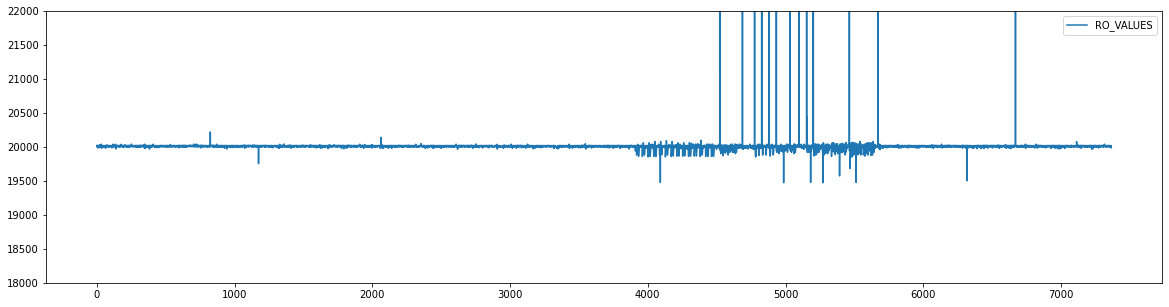

In [13]:
df.plot(subplots=True, figsize=(20,5))
plt.ylim(18000,22000)
plt.show()

In [7]:
def extract_features(window, only_stat=False):
    features = {}
    
    features['mean'] = window.mean()
    features['std'] = window.std()
    features['median'] = np.median(window)
    
    if only_stat == True:
        return pd.Series(features)
        
    
    # Discrete Wavelet Transform (DWT) using pywt library
    coeffs = pywt.dwt(window, 'db4')
    features['cA'] = np.mean(coeffs[0])  # Approximation coefficients
    features['cD'] = np.mean(coeffs[1])  # Detail coefficients
#     window['time_index'] = range(len(window))
#     window['id'] = [1]*len(window)
    
#     print(window)
#     ts_fresh_feats = ef(window, column_id = 'id')
    
#     print(ts_fresh_feats)
#     apput
    
    return pd.Series(features)


In [8]:
window_size = 500
stride = 1

windows = [df.iloc[i:i+window_size] for i in range(0, len(df)-window_size+1, stride)]
features_df = pd.DataFrame([extract_features(window) for window in windows])

medians = features_df['median']

normalized_features = (features_df - features_df.mean()) / features_df.std()

normalized_features['median'] = medians

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(normalized_features)

/tmp/ipykernel_134134/986604382.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features['mean'] = window.mean()
/tmp/ipykernel_134134/986604382.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features['std'] = window.std()


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
cluster_1_indices = np.where(cluster_labels == 1)[0]

In [ ]:
exec_data = df.iloc[cluster_1_indices]
exec_data.reset_index(drop=True, inplace=True)
# exec_data = exec_data[2000:]

In [ ]:
exec_data.plot()

In [ ]:
exec_data = exec_data['RO_VALUES']

In [ ]:
window_size = 150
stride = 1

windows = [exec_data.iloc[i:i+window_size] for i in range(0, len(exec_data)-window_size+1, stride)]
features_df = pd.DataFrame([extract_features(window) for window in windows])


normalized_features = (features_df - features_df.mean()) / features_df.std()


num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(normalized_features)


In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(cluster_labels)), cluster_labels, c=cluster_labels, cmap='viridis')
plt.xlabel('Window')
plt.ylabel('Cluster Label')
plt.title('Window vs Cluster Label')
plt.show()